In [2]:
import numpy as np
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import os
import sys
from scipy import signal
import game_of_life as gol
from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib inline

# Setting up video encoder paths
ff_path = os.path.join('C:/', 'ImageMagick-7.0.9-Q16', 'ffmpeg.exe')
plt.rcParams['animation.ffmpeg_path'] = ff_path
if ff_path not in sys.path: sys.path.append(ff_path)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [80]:
importlib.reload(gol)

<module 'game_of_life' from 'C:\\Users\\arttu.lehtinen\\Desktop\\general_DataScience\\gameOfLife\\game_of_life.py'>

In [ ]:
#1. Solu muuttuu eläväksi, jos sen naapureista tasan kolme on eläviä.
#2. Solu pysyy elävänä, jos sen naapureista tasan 2 tai 3 on eläviä. Muuten solu kuolee.

In [72]:
Size=10
world_array=np.random.choice([0, 1], size=(Size,Size))
world_array=np.zeros([Size,Size])
# Glider
world_array[2:5,4]=1
world_array[4,3]=1
world_array[3,2]=1
print(world_array)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [81]:
game=gol.GameOfLife(world_array)
steps=game.run(duration=50,rule={'birth':[3,6],'survive':[2,3]})

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [82]:
game.rule

{'birth': [3, 6], 'survive': [2, 3]}

KeyboardInterrupt: 

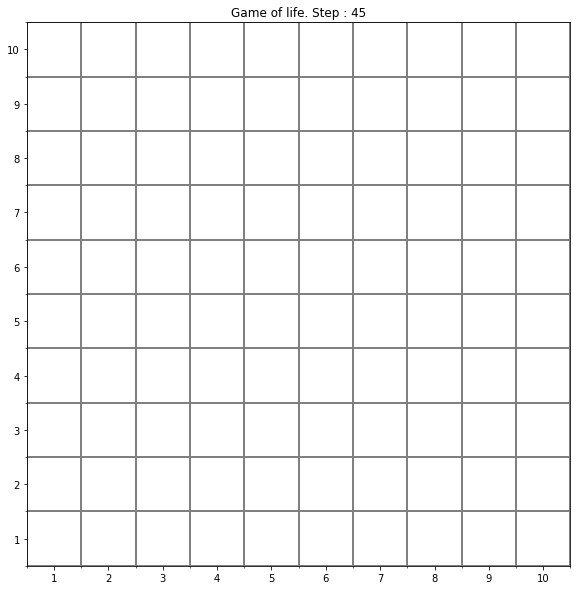

In [70]:


anim= gol.gol_animation(steps)

FFwriter = animation.FFMpegWriter(fps=30, extra_args=['-vcodec', 'libx264'])
#C:\Users\arttu.lehtinen\Desktop
anim.save(os.path.join('C:/','Users\\arttu.lehtinen\\Desktop\\projektit','basic_animation.mp4'), writer = FFwriter)
#

plt.show()

In [66]:
HTML(anim.to_html5_video())

In [57]:
world_array

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [9]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to had
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r)) 

In [11]:
!pip freeze

alabaster==0.7.12
anaconda-client==1.7.2
anaconda-project==0.8.3
asn1crypto==1.3.0
astroid==2.3.3
astropy==4.0
atomicwrites==1.3.0
attrs==19.3.0
Babel==2.8.0
backcall==0.1.0
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
beautifulsoup4==4.8.2
bitarray==1.2.0
bkcharts==0.2
bleach==3.1.0
bokeh==1.4.0
boto==2.49.0
Bottleneck==1.3.1
certifi==2019.11.28
cffi==1.13.2
chardet==3.0.4
Click==7.0
cloudpickle==1.2.2
clyent==1.2.2
colorama==0.4.3
comtypes==1.1.7
contextlib2==0.6.0.post1
cryptography==2.8
cycler==0.10.0
Cython==0.29.14
cytoolz==0.10.1
dask==2.9.2
decorator==4.4.1
defusedxml==0.6.0
distributed==2.9.3
docutils==0.15.2
entrypoints==0.3
et-xmlfile==1.0.1
fastcache==1.1.0
filelock==3.0.12
Flask==1.1.1
fsspec==0.6.2
gevent==1.4.0
glob2==0.7
greenlet==0.4.15
h5py==2.9.0
HeapDict==1.0.1
html5lib==1.0.1
hypothesis==4.54.2
idna==2.8
imageio==2.6.1
imagesize==1.2.0
importlib-metadata==1.3.0
ipykernel==5.1.3
ipython==7.11.1
ipython-genutils==0.2.0
ipywidgets==7.5.1
isort==4.3.21

In [28]:
test==[1]

array([[ True, False, False],
       [False, False, False],
       [False, False, False]])

In [51]:
test=np.array([1,2,3,4,5,6,7,8,9]).reshape(3,3)
test
mask_lst=[]
for i in [2,6,8]:
    mask_lst.append(test==i)
mask_lst

birth_conditions_mask=[test==i for i in [2]]
birth_mask=np.logical_or.reduce(birth_masks)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

[array([[False,  True, False],
        [False, False, False],
        [False, False, False]]), array([[False, False, False],
        [False, False,  True],
        [False, False, False]]), array([[False, False, False],
        [False, False, False],
        [False,  True, False]])]

array([[False,  True, False],
       [False, False, False],
       [False, False, False]])

In [40]:
    
np.logical_or.reduce([test==8,test==[2,3]])    
#mask_b=np.logical_or(mask_a,mask_b)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

C:\ProgramData\Anaconda3\envs\test_env\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  import sys


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()